# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import random
from citipy import citipy

## Generate Cities List

# List for holding lat_lngs and cities
lat_zone = np.arange(-90, 90, 10)
lng_zone = np.arange(-180, 180, 10)

# Create dataframe for storing data
cities_df = pd.DataFrame()

# Make columns in dataframe
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["City"] = ""
cities_df["Country"] = ""

cities_df.head()

,Latitude,Longitude,City,Country


In [9]:
# Create 'for' loop to get latitude and longitude values
for lat_coordinates in lat_zone:
    
    for lng_coordinates in lng_zone:

        # Get list of latitude and longitude values
        lat_values = list(np.arange(lat_coordinates, lat_coordinates + 15, 0.01))
        lng_values = list(np.arange(lng_coordinates, lng_coordinates + 15, 0.01))
        random_lats = random.sample(lat_values, 50)
        random_lngs = random.sample(lng_values, 50)
        lat_samples = [lat_coordinates + lat for lat in random_lats]
        lng_samples = [lng_coordinates + lon for lon in random_lngs]
        
        # Store values in dataframe created
        cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude": lat_samples, "Longitude": lng_samples}))

cities_df = cities_df.reset_index(drop=True)
cities_df.head()

C:\Users\Johnny Saniel\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,City,Country,Latitude,Longitude
0,NaN,NaN,-165.96,-353.78
1,NaN,NaN,-169.18,-352.38
2,NaN,NaN,-166.43,-356.77
3,NaN,NaN,-170.84,-353.92
4,NaN,NaN,-175.87,-355.62


In [10]:
# Latitude and longitude zones
lat_zone = np.arange(-90, 90, 10)
lng_zone = np.arange(-180, 180, 10)

# Create dataframes
cities_df = pd.DataFrame()
cities_df["Latitude"] = ""
cities_df["Longitude"] = ""
cities_df["City"] = ""
cities_df["Country"] = ""

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather"

params = {"appid": "2ec88724f3fad131ccffe1dfb2efab45", "units": "metric"}

# Use 'for' loop to retrieve weather info by rows in dataframe
for column, row in random_cities_df.iterrows():
    
    # Reference rows for 'q' param
    params["q"] = f'{row["City"]}, {row["Country"]}'
    
    # Get and print links for each city
    print(f'Weather information for {params["q"]}')
    weather_response = req.get(url, params)
    print(weather_response.url)
    weather_response  = weather_response.json()
    
    # Get weather data and input into dataframe
    random_cities_df.set_value(column, "Latitude", weather_response.get("coord", {}).get("lat"))
    random_cities_df.set_value(column, "Longitude", weather_response.get("coord", {}).get("lon"))
    random_cities_df.set_value(column, "Temperature", weather_response.get("main", {}).get("temp_max"))
    random_cities_df.set_value(column, "Wind Speed", weather_response.get("wind", {}).get("speed"))
    random_cities_df.set_value(column, "Humidity", weather_response.get("main", {}).get("humidity"))
    random_cities_df.set_value(column, "Cloudiness", weather_response.get("clouds", {}).get("all"))


Weather information for ozinki, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=ozinki%2C+ru
Weather information for mapiripan, co


C:\Users\Johnny Saniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Johnny Saniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Johnny Saniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Johnny Saniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Johnny Saniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessor

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=mapiripan%2C+co
Weather information for dolbeau, ca
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=dolbeau%2C+ca
Weather information for trinidad, bo
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=trinidad%2C+bo
Weather information for port hardy, ca
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=port+hardy%2C+ca
Weather information for peniche, pt
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=peniche%2C+pt
Weather information for porosozero, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=porosozero%2C+ru
Weather information for dongsheng, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1d

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=juba%2C+sd
Weather information for benxi, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=benxi%2C+cn
Weather information for sakakah, sa
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=sakakah%2C+sa
Weather information for kumo, ng
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kumo%2C+ng
Weather information for alotau, pg
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=alotau%2C+pg
Weather information for howard springs, au
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=howard+springs%2C+au
Weather information for yeppoon, au
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=met

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=anloga%2C+gh
Weather information for bluff, nz
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=bluff%2C+nz
Weather information for butaritari, ki
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=butaritari%2C+ki
Weather information for pietarsaari, fi
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=pietarsaari%2C+fi
Weather information for simao, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=simao%2C+cn
Weather information for pokaran, in
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=pokaran%2C+in
Weather information for santiago, ph
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&un

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=yanji%2C+cn
Weather information for kawhia, nz
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kawhia%2C+nz
Weather information for cody, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=cody%2C+us
Weather information for felidhoo, mv
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=felidhoo%2C+mv
Weather information for pastavy, by
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=pastavy%2C+by
Weather information for watsa, cd
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=watsa%2C+cd
Weather information for aconibe, gq
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=aconi

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kavieng%2C+pg
Weather information for tucuman, ar
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tucuman%2C+ar
Weather information for jibuti, dj
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=jibuti%2C+dj
Weather information for taguatinga, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=taguatinga%2C+br
Weather information for richards bay, za
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=richards+bay%2C+za
Weather information for saint-pierre, pm
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=saint-pierre%2C+pm
Weather information for erzin, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccf

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=bassano%2C+ca
Weather information for yilan, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=yilan%2C+cn
Weather information for spassk, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=spassk%2C+ru
Weather information for shatsk, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=shatsk%2C+ru
Weather information for georgetown, gy
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=georgetown%2C+gy
Weather information for barao de melgaco, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=barao+de+melgaco%2C+br
Weather information for melo, uy
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2ef

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=piet+retief%2C+za
Weather information for clarence town, bs
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=clarence+town%2C+bs
Weather information for pimentel, pe
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=pimentel%2C+pe
Weather information for bonthe, sl
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=bonthe%2C+sl
Weather information for mufumbwe, zm
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=mufumbwe%2C+zm
Weather information for sobreira, pt
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=sobreira%2C+pt
Weather information for treinta y tres, uy
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad1

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kadoma%2C+zw
Weather information for usevya, tz
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=usevya%2C+tz
Weather information for christchurch, nz
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=christchurch%2C+nz
Weather information for kjollefjord, no
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=kjollefjord%2C+no
Weather information for ostrovnoy, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=ostrovnoy%2C+ru
Weather information for paracuru, br
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=paracuru%2C+br
Weather information for magistralnyy, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad13

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=le+port%2C+re
Weather information for mataura, pf
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=mataura%2C+pf
Weather information for pacific grove, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=pacific+grove%2C+us
Weather information for blackfoot, us
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=blackfoot%2C+us
Weather information for mandali, iq
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=mandali%2C+iq
Weather information for shuangyang, cn
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=shuangyang%2C+cn
Weather information for portland, au
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131cc

http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=hamina%2C+fi
Weather information for sayanskiy, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=sayanskiy%2C+ru
Weather information for puerto leguizamo, co
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=puerto+leguizamo%2C+co
Weather information for ust-kulom, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=ust-kulom%2C+ru
Weather information for bridlington, gb
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=bridlington%2C+gb
Weather information for tyret pervaya, ru
http://api.openweathermap.org/data/2.5/weather?appid=2ec88724f3fad131ccffe1dfb2efab45&units=metric&q=tyret+pervaya%2C+ru
Weather information for conde, br
http://api.openweathermap.org/data/2.5/weather?appi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Display dataframe with all info
random_cities_df

# Remove cities with no data available
new_random_cities_df = random_cities_df.dropna()
new_random_cities_df.head()

# Save dataframe to csv file
new_random_cities_df.to_csv("Weather_Info.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

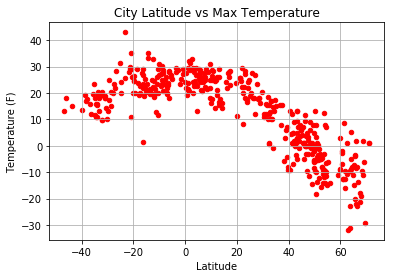

In [15]:
lat_tmp = new_random_cities_df.plot(kind="scatter", x="Latitude", y="Temperature", color="red", grid=True)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("LatitudeVsTemperature.png")
plt.show()

#### Latitude vs. Humidity Plot

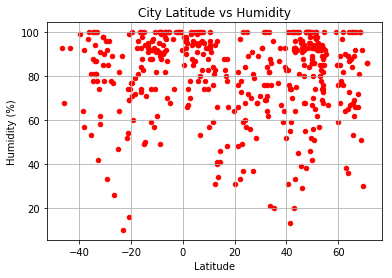

In [16]:
lat_hum = new_random_cities_df.plot(kind="scatter", x="Latitude", y="Humidity", color="red", grid=True)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("LatitudeVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

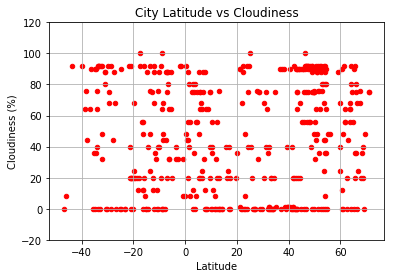

In [17]:
lat_cld = new_random_cities_df.plot(kind="scatter", x="Latitude", y="Cloudiness", color="red", grid=True)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-20, 120)
plt.savefig("LatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

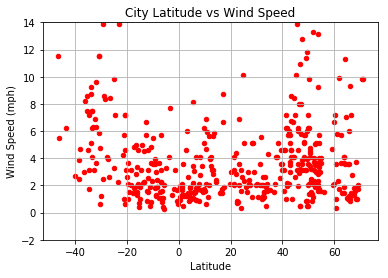

In [18]:
lat_wnd = new_random_cities_df.plot(kind="scatter", x="Latitude", y="Wind Speed", color="red", grid=True)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2, 14)
plt.savefig("LatitudeVsWindSpeed.png")
plt.show()